In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from scipy.special import boxcox1p
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_org=pd.read_csv('cars_datafinal.csv')
df_org.head()

,Name,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type
0,2010 Maruti Alto LXI,"₹ 174,699",4out of 5,3686,"Kilometers34,854 km",Year of PurchaseMay 2010,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP09,NaN,Insurance TypeInsurance Expired
1,2013 Maruti Wagon R 1.0 VXI,"₹ 333,999",4.2out of 5,3686,"Kilometers39,541 km",Year of PurchaseJuly 2013,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance6/8/2021,Insurance TypeComp
2,2014 Maruti Wagon R 1.0 VXI,"₹ 353,199",4.3out of 5,3686,"Kilometers23,233 km",Year of PurchaseMarch 2014,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance28/4/2021,Insurance TypeComp
3,2013 Hyundai Eon D LITE PLUS,"₹ 237,899",4.4out of 5,3686,"Kilometers27,748 km",Year of PurchaseNovember 2013,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP13,Insurance1/1/2022,Insurance TypeComp
4,2017 Hyundai Eon ERA PLUS,"₹ 300,699",4.4out of 5,3686,"Kilometers12,238 km",Year of PurchaseAugust 2017,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOTS10,NaN,Insurance TypeExpired


In [3]:
df=df_org.copy()

In [4]:
df.head()

,Name,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type
0,2010 Maruti Alto LXI,"₹ 174,699",4out of 5,3686,"Kilometers34,854 km",Year of PurchaseMay 2010,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP09,NaN,Insurance TypeInsurance Expired
1,2013 Maruti Wagon R 1.0 VXI,"₹ 333,999",4.2out of 5,3686,"Kilometers39,541 km",Year of PurchaseJuly 2013,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance6/8/2021,Insurance TypeComp
2,2014 Maruti Wagon R 1.0 VXI,"₹ 353,199",4.3out of 5,3686,"Kilometers23,233 km",Year of PurchaseMarch 2014,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance28/4/2021,Insurance TypeComp
3,2013 Hyundai Eon D LITE PLUS,"₹ 237,899",4.4out of 5,3686,"Kilometers27,748 km",Year of PurchaseNovember 2013,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP13,Insurance1/1/2022,Insurance TypeComp
4,2017 Hyundai Eon ERA PLUS,"₹ 300,699",4.4out of 5,3686,"Kilometers12,238 km",Year of PurchaseAugust 2017,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOTS10,NaN,Insurance TypeExpired


In [5]:
df.describe()

,city
count,32158.000000
mean,2883.844207
std,1569.462476
min,290.000000
25%,1692.000000
50%,2423.000000
75%,4709.000000
max,5732.000000


In [6]:
df.dtypes

Name                object
Price               object
Rating              object
city                 int64
Kilometers          object
Year_of_Purchase    object
Owner               object
Fuel_Type           object
Transmission        object
RTO                 object
Insurance           object
Insurance_Type      object
dtype: object

In [7]:
df.isnull().sum()

Name                   0
Price                  0
Rating                 0
city                   0
Kilometers             0
Year_of_Purchase       0
Owner                  0
Fuel_Type              0
Transmission        2816
RTO                    0
Insurance           9193
Insurance_Type         0
dtype: int64

In [8]:
df2=df['Name'].str.split(" ",n=2,expand=True)
df['Year']=df2[0]
df['Company']=df2[1]
df['Car_Model']=df2[2]

In [9]:
df.drop(columns=['Name','Insurance'],axis=1,inplace=True)

In [10]:
df.head()

,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance_Type,Year,Company,Car_Model
0,"₹ 174,699",4out of 5,3686,"Kilometers34,854 km",Year of PurchaseMay 2010,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP09,Insurance TypeInsurance Expired,2010,Maruti,Alto LXI
1,"₹ 333,999",4.2out of 5,3686,"Kilometers39,541 km",Year of PurchaseJuly 2013,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance TypeComp,2013,Maruti,Wagon R 1.0 VXI
2,"₹ 353,199",4.3out of 5,3686,"Kilometers23,233 km",Year of PurchaseMarch 2014,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance TypeComp,2014,Maruti,Wagon R 1.0 VXI
3,"₹ 237,899",4.4out of 5,3686,"Kilometers27,748 km",Year of PurchaseNovember 2013,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP13,Insurance TypeComp,2013,Hyundai,Eon D LITE PLUS
4,"₹ 300,699",4.4out of 5,3686,"Kilometers12,238 km",Year of PurchaseAugust 2017,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOTS10,Insurance TypeExpired,2017,Hyundai,Eon ERA PLUS


In [11]:
df['Year']=df['Year'].astype(int)

In [12]:
df2=df['Price'].str.split(" ",n=1,expand=True)
df['Price']=df2[1]

In [13]:
df2.head()

,0,1
0,₹,"174,699"
1,₹,"333,999"
2,₹,"353,199"
3,₹,"237,899"
4,₹,"300,699"


In [14]:
df.head()

,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance_Type,Year,Company,Car_Model
0,"174,699",4out of 5,3686,"Kilometers34,854 km",Year of PurchaseMay 2010,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP09,Insurance TypeInsurance Expired,2010,Maruti,Alto LXI
1,"333,999",4.2out of 5,3686,"Kilometers39,541 km",Year of PurchaseJuly 2013,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance TypeComp,2013,Maruti,Wagon R 1.0 VXI
2,"353,199",4.3out of 5,3686,"Kilometers23,233 km",Year of PurchaseMarch 2014,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance TypeComp,2014,Maruti,Wagon R 1.0 VXI
3,"237,899",4.4out of 5,3686,"Kilometers27,748 km",Year of PurchaseNovember 2013,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP13,Insurance TypeComp,2013,Hyundai,Eon D LITE PLUS
4,"300,699",4.4out of 5,3686,"Kilometers12,238 km",Year of PurchaseAugust 2017,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOTS10,Insurance TypeExpired,2017,Hyundai,Eon ERA PLUS


In [15]:
df['Price']=df['Price'].str.replace(',', '')

In [16]:
df.dtypes

Price               object
Rating              object
city                 int64
Kilometers          object
Year_of_Purchase    object
Owner               object
Fuel_Type           object
Transmission        object
RTO                 object
Insurance_Type      object
Year                 int32
Company             object
Car_Model           object
dtype: object

In [17]:
df.head()

,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance_Type,Year,Company,Car_Model
0,174699,4out of 5,3686,"Kilometers34,854 km",Year of PurchaseMay 2010,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP09,Insurance TypeInsurance Expired,2010,Maruti,Alto LXI
1,333999,4.2out of 5,3686,"Kilometers39,541 km",Year of PurchaseJuly 2013,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance TypeComp,2013,Maruti,Wagon R 1.0 VXI
2,353199,4.3out of 5,3686,"Kilometers23,233 km",Year of PurchaseMarch 2014,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance TypeComp,2014,Maruti,Wagon R 1.0 VXI
3,237899,4.4out of 5,3686,"Kilometers27,748 km",Year of PurchaseNovember 2013,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP13,Insurance TypeComp,2013,Hyundai,Eon D LITE PLUS
4,300699,4.4out of 5,3686,"Kilometers12,238 km",Year of PurchaseAugust 2017,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOTS10,Insurance TypeExpired,2017,Hyundai,Eon ERA PLUS


In [18]:
df['Price']=df['Price'].astype(int)

In [19]:
df.dtypes

Price                int32
Rating              object
city                 int64
Kilometers          object
Year_of_Purchase    object
Owner               object
Fuel_Type           object
Transmission        object
RTO                 object
Insurance_Type      object
Year                 int32
Company             object
Car_Model           object
dtype: object

In [20]:
df['Kilometers']=df['Kilometers'].str.replace('Kilometers', '')

In [21]:
df.dtypes

Price                int32
Rating              object
city                 int64
Kilometers          object
Year_of_Purchase    object
Owner               object
Fuel_Type           object
Transmission        object
RTO                 object
Insurance_Type      object
Year                 int32
Company             object
Car_Model           object
dtype: object

In [22]:
df.head()

,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance_Type,Year,Company,Car_Model
0,174699,4out of 5,3686,"34,854 km",Year of PurchaseMay 2010,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP09,Insurance TypeInsurance Expired,2010,Maruti,Alto LXI
1,333999,4.2out of 5,3686,"39,541 km",Year of PurchaseJuly 2013,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance TypeComp,2013,Maruti,Wagon R 1.0 VXI
2,353199,4.3out of 5,3686,"23,233 km",Year of PurchaseMarch 2014,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance TypeComp,2014,Maruti,Wagon R 1.0 VXI
3,237899,4.4out of 5,3686,"27,748 km",Year of PurchaseNovember 2013,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP13,Insurance TypeComp,2013,Hyundai,Eon D LITE PLUS
4,300699,4.4out of 5,3686,"12,238 km",Year of PurchaseAugust 2017,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOTS10,Insurance TypeExpired,2017,Hyundai,Eon ERA PLUS


In [23]:
df2=df['Kilometers'].str.split(" ",n=1,expand=True)
df['Kilometers']=df2[0]

In [24]:
df2.head()

,0,1
0,"34,854",km
1,"39,541",km
2,"23,233",km
3,"27,748",km
4,"12,238",km


In [25]:
df.head()

,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance_Type,Year,Company,Car_Model
0,174699,4out of 5,3686,"34,854",Year of PurchaseMay 2010,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP09,Insurance TypeInsurance Expired,2010,Maruti,Alto LXI
1,333999,4.2out of 5,3686,"39,541",Year of PurchaseJuly 2013,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance TypeComp,2013,Maruti,Wagon R 1.0 VXI
2,353199,4.3out of 5,3686,"23,233",Year of PurchaseMarch 2014,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance TypeComp,2014,Maruti,Wagon R 1.0 VXI
3,237899,4.4out of 5,3686,"27,748",Year of PurchaseNovember 2013,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP13,Insurance TypeComp,2013,Hyundai,Eon D LITE PLUS
4,300699,4.4out of 5,3686,"12,238",Year of PurchaseAugust 2017,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOTS10,Insurance TypeExpired,2017,Hyundai,Eon ERA PLUS


In [26]:
df['Kilometers']=df['Kilometers'].str.replace(',', '')

In [27]:
df.head()

,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance_Type,Year,Company,Car_Model
0,174699,4out of 5,3686,34854,Year of PurchaseMay 2010,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP09,Insurance TypeInsurance Expired,2010,Maruti,Alto LXI
1,333999,4.2out of 5,3686,39541,Year of PurchaseJuly 2013,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance TypeComp,2013,Maruti,Wagon R 1.0 VXI
2,353199,4.3out of 5,3686,23233,Year of PurchaseMarch 2014,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance TypeComp,2014,Maruti,Wagon R 1.0 VXI
3,237899,4.4out of 5,3686,27748,Year of PurchaseNovember 2013,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP13,Insurance TypeComp,2013,Hyundai,Eon D LITE PLUS
4,300699,4.4out of 5,3686,12238,Year of PurchaseAugust 2017,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOTS10,Insurance TypeExpired,2017,Hyundai,Eon ERA PLUS


In [28]:
df['Kilometers']=df['Kilometers'].astype(int)

In [29]:
df.dtypes

Price                int32
Rating              object
city                 int64
Kilometers           int32
Year_of_Purchase    object
Owner               object
Fuel_Type           object
Transmission        object
RTO                 object
Insurance_Type      object
Year                 int32
Company             object
Car_Model           object
dtype: object

In [30]:
df['Owner']=df['Owner'].str.replace('Owner', '')

In [31]:
df.head()

,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance_Type,Year,Company,Car_Model
0,174699,4out of 5,3686,34854,Year of PurchaseMay 2010,First,FuelPetrol,TransmissionMANUAL,RTOAP09,Insurance TypeInsurance Expired,2010,Maruti,Alto LXI
1,333999,4.2out of 5,3686,39541,Year of PurchaseJuly 2013,Second,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance TypeComp,2013,Maruti,Wagon R 1.0 VXI
2,353199,4.3out of 5,3686,23233,Year of PurchaseMarch 2014,Second,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance TypeComp,2014,Maruti,Wagon R 1.0 VXI
3,237899,4.4out of 5,3686,27748,Year of PurchaseNovember 2013,First,FuelPetrol,TransmissionMANUAL,RTOAP13,Insurance TypeComp,2013,Hyundai,Eon D LITE PLUS
4,300699,4.4out of 5,3686,12238,Year of PurchaseAugust 2017,Second,FuelPetrol,TransmissionMANUAL,RTOTS10,Insurance TypeExpired,2017,Hyundai,Eon ERA PLUS


In [32]:
df['Transmission']=df['Transmission'].str.replace('Transmission', '')

In [33]:
df['Insurance_Type']=df['Insurance_Type'].str.replace('Insurance', '')

In [34]:
df['Fuel_Type']=df['Fuel_Type'].str.replace('Fuel', '')

In [35]:
df['Rating']=df['Rating'].str.replace('out of 5', '')

In [36]:
df['Rating']=df['Rating'].astype(float)

In [37]:
df["Insurance_Type"]=df["Insurance_Type"].str.replace('Comp', 'Comprehensive')
df["Insurance_Type"]=df["Insurance_Type"].str.replace('Zero_Dep', 'ZeroDepreciation')
df["Insurance_Type"]=df["Insurance_Type"].str.replace('3rdParty', 'Third_party')
df["Insurance_Type"]=df["Insurance_Type"].str.replace('NotAvailable', 'Expired')

In [38]:
df.head()

,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance_Type,Year,Company,Car_Model
0,174699,4.0,3686,34854,Year of PurchaseMay 2010,First,Petrol,MANUAL,RTOAP09,Type Expired,2010,Maruti,Alto LXI
1,333999,4.2,3686,39541,Year of PurchaseJuly 2013,Second,Petrol,MANUAL,RTOAP28,TypeComprehensive,2013,Maruti,Wagon R 1.0 VXI
2,353199,4.3,3686,23233,Year of PurchaseMarch 2014,Second,Petrol,MANUAL,RTOAP28,TypeComprehensive,2014,Maruti,Wagon R 1.0 VXI
3,237899,4.4,3686,27748,Year of PurchaseNovember 2013,First,Petrol,MANUAL,RTOAP13,TypeComprehensive,2013,Hyundai,Eon D LITE PLUS
4,300699,4.4,3686,12238,Year of PurchaseAugust 2017,Second,Petrol,MANUAL,RTOTS10,TypeExpired,2017,Hyundai,Eon ERA PLUS


In [39]:
import statsmodels.formula.api as smf
pro=smf.ols("Price~Rating+Kilometers+Owner+Fuel_Type+Transmission",data=df).fit()
pro.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     1059.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:59:43   Log-Likelihood:            -4.1411e+05
No. Observations:               29342   AIC:                         8.283e+05
Df Residuals:                   29324   BIC:                         8.284e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  3.245e+05   1.24e+05      2.618      0.009    8.15e+04    5.67e+05
Owner[T.Fifth ]           -8.563e+04   1.25e+05     -0.682      0.495   -3.32e+05     1.6e+05
Owner[T.First ]           -2.173e+04   1.23e+05     -0.176      0.860   -2.64e+05     2.2e+05
Owner[T.Fourth ]          -9.944e+04   1.24e+05     -0.803      0.422   -3.42e+05    1.43e+05
Owner[T.Ninth ]           -6.783e+04   2.25e+05     -0.302      0.763   -5.09e+05    3.73e+05
Owner[T.Second ]          -8.609e+04   1.23e+05     -0.698      0.485   -3.28e+05    1.56e+05
Owner[T.Seventh ]         -2.504e+04   1.45e+05     -0.172      0.863    -3.1e+05     2.6e+05
Owner[T.Sixth ]            2.432e+04   1.32e+05      0.184      0.854   -2.35e+05    2.84e+05
Owner[T.Tenth ]           -3.691e+04   1.91e+05     -0.193      0.847   -4.11e+05    3.37e+05
Owner[T.Third ]           -1.051e+05   1.23e+05     -0.851      0.395   -3.47e+05    1.37e+05
Fuel_Type[T.Electric]     -3.327e+05   8.16e+04     -4.078      0.000   -4.93e+05   -1.73e+05
Fuel_Type[T.Hybrid]        5.827e+06   3.26e+05     17.871      0.000    5.19e+06    6.47e+06
Fuel_Type[T.Petrol]       -2.711e+05   4333.809    -62.555      0.000    -2.8e+05   -2.63e+05
Fuel_Type[T.Petrol + CNG] -2.497e+05   9225.512    -27.070      0.000   -2.68e+05   -2.32e+05
Fuel_Type[T.Petrol + LPG] -2.843e+05   1.54e+04    -18.486      0.000   -3.14e+05   -2.54e+05
Transmission[T.MANUAL]    -4.516e+05   6653.099    -67.871      0.000   -4.65e+05   -4.39e+05
Rating                     2.001e+05   3575.356     55.959      0.000    1.93e+05    2.07e+05
Kilometers                   -1.0267      0.043    -24.138      0.000      -1.110      -0.943
==============================================================================
Omnibus:                    34276.237   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10492616.836
Skew:                           5.787   Prob(JB):                         0.00
Kurtosis:                      94.915   Cond. No.                     1.99e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
df.drop(columns=['RTO','Year_of_Purchase'],axis=1,inplace=True)

In [41]:
df.head()

,Price,Rating,city,Kilometers,Owner,Fuel_Type,Transmission,Insurance_Type,Year,Company,Car_Model
0,174699,4.0,3686,34854,First,Petrol,MANUAL,Type Expired,2010,Maruti,Alto LXI
1,333999,4.2,3686,39541,Second,Petrol,MANUAL,TypeComprehensive,2013,Maruti,Wagon R 1.0 VXI
2,353199,4.3,3686,23233,Second,Petrol,MANUAL,TypeComprehensive,2014,Maruti,Wagon R 1.0 VXI
3,237899,4.4,3686,27748,First,Petrol,MANUAL,TypeComprehensive,2013,Hyundai,Eon D LITE PLUS
4,300699,4.4,3686,12238,Second,Petrol,MANUAL,TypeExpired,2017,Hyundai,Eon ERA PLUS


In [42]:
df.dtypes

Price               int32
Rating            float64
city                int64
Kilometers          int32
Owner              object
Fuel_Type          object
Transmission       object
Insurance_Type     object
Year                int32
Company            object
Car_Model          object
dtype: object

In [43]:
df.describe()

,Price,Rating,city,Kilometers,Year
count,3.215800e+04,32158.000000,32158.000000,3.215800e+04,32158.000000
mean,4.760937e+05,4.046806,2883.844207,7.630189e+04,2012.378537
std,4.521493e+05,0.617091,1569.462476,5.303039e+04,4.509912
min,1.000000e+00,0.500000,290.000000,1.000000e+00,1980.000000
25%,2.100000e+05,3.800000,1692.000000,3.833125e+04,2010.000000
50%,3.680000e+05,4.100000,2423.000000,6.924700e+04,2013.000000
75%,6.000000e+05,4.400000,4709.000000,1.015375e+05,2016.000000
max,1.080170e+07,5.000000,5732.000000,1.234567e+06,2020.000000


In [44]:
df.isnull().sum()

Price                0
Rating               0
city                 0
Kilometers           0
Owner                0
Fuel_Type            0
Transmission      2816
Insurance_Type       0
Year                 0
Company              0
Car_Model            0
dtype: int64

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
mode_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df['Transmission'] = pd.DataFrame(mode_imputer.fit_transform(df[['Transmission']]))

In [47]:
df.isnull().sum()

Price             0
Rating            0
city              0
Kilometers        0
Owner             0
Fuel_Type         0
Transmission      0
Insurance_Type    0
Year              0
Company           0
Car_Model         0
dtype: int64

<AxesSubplot:>

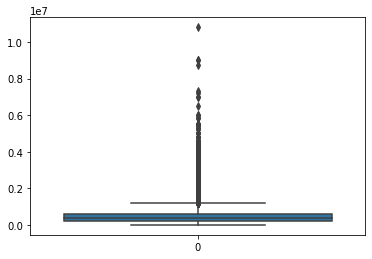

In [48]:
sns.boxplot(data=df.Price)

<AxesSubplot:>

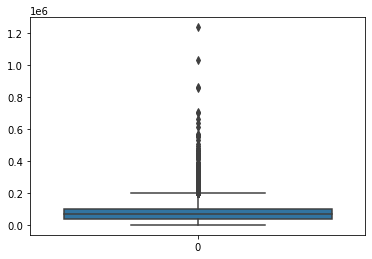

In [49]:
sns.boxplot(data=df.Kilometers)

In [50]:
IQR = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)
lower_limit_p = df['Price'].quantile(0.25) - (IQR * 1.5)
upper_limit_p = df['Price'].quantile(0.75) + (IQR * 1.5)
lower_limit_p,upper_limit_p

(-375000.0, 1185000.0)

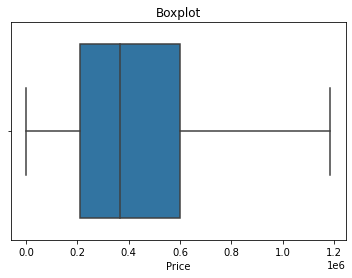

In [51]:
df['Price']= pd.DataFrame(np.where(df['Price'] > upper_limit_p, upper_limit_p,
                                    np.where(df['Price'] < lower_limit_p, lower_limit_p, df['Price'])))
sns.boxplot(df.Price)
plt.title('Boxplot')
plt.show()

In [52]:
IQR = df['Kilometers'].quantile(0.75) - df['Kilometers'].quantile(0.25)
lower_limit_k = df['Kilometers'].quantile(0.25) - (IQR * 1.5)
upper_limit_k = df['Kilometers'].quantile(0.75) + (IQR * 1.5)
lower_limit_k,upper_limit_k

(-56478.125, 196346.875)

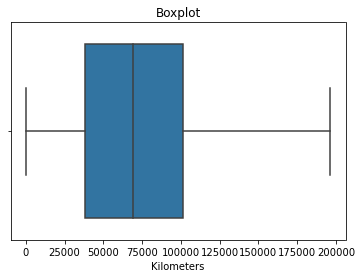

In [53]:
df['Kilometers']= pd.DataFrame(np.where(df['Kilometers'] > upper_limit_k, upper_limit_k,
                                    np.where(df['Kilometers'] < lower_limit_k, lower_limit_k, df['Kilometers'])))
sns.boxplot(df.Kilometers)
plt.title('Boxplot')
plt.show()

In [54]:
df=pd.get_dummies(data=df,drop_first=True)

In [55]:
df.head()

,Price,Rating,city,Kilometers,Year,Owner_Fifth,Owner_First,Owner_Fourth,Owner_Ninth,Owner_Second,...,Car_Model_i20 Magna O 1.4 CRDI,Car_Model_i20 SPORTZ 1.2 O,Car_Model_i20 SPORTZ 1.2 VTVT,Car_Model_i20 SPORTZ 1.4 AT VTVT,Car_Model_i20 SPORTZ 1.4 CRDI,Car_Model_i20 SPORTZ 1.4 CRDI 6 SPEED BS IV,Car_Model_i20 SPORTZ O 1.4 CRDI,Car_Model_i20 Sportz 1.2 O,Car_Model_i20 Sportz 1.2 VTVT,Car_Model_spacio 3.0L DI
0,174699.0,4.0,3686,34854.0,2010,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,333999.0,4.2,3686,39541.0,2013,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,353199.0,4.3,3686,23233.0,2014,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,237899.0,4.4,3686,27748.0,2013,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,300699.0,4.4,3686,12238.0,2017,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


0.9189949320342946

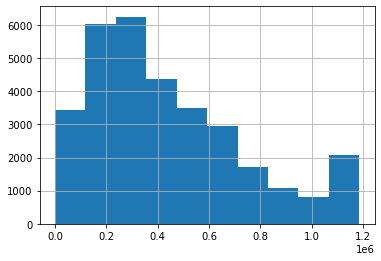

In [56]:
df['Price'].hist()
df['Price'].skew()

0.691978469644594

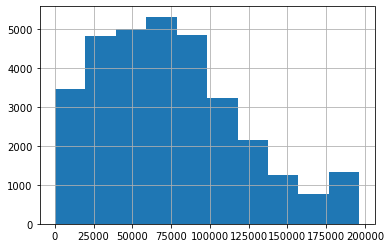

In [57]:
df['Kilometers'].hist()
df['Kilometers'].skew()

-2.365609912696441

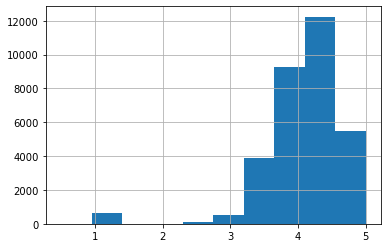

In [58]:
df['Rating'].hist()
df['Rating'].skew()

In [59]:
X = df.drop(columns=['Price'],axis='columns')
y = df.Price

In [60]:
X.head()

,Rating,city,Kilometers,Year,Owner_Fifth,Owner_First,Owner_Fourth,Owner_Ninth,Owner_Second,Owner_Seventh,...,Car_Model_i20 Magna O 1.4 CRDI,Car_Model_i20 SPORTZ 1.2 O,Car_Model_i20 SPORTZ 1.2 VTVT,Car_Model_i20 SPORTZ 1.4 AT VTVT,Car_Model_i20 SPORTZ 1.4 CRDI,Car_Model_i20 SPORTZ 1.4 CRDI 6 SPEED BS IV,Car_Model_i20 SPORTZ O 1.4 CRDI,Car_Model_i20 Sportz 1.2 O,Car_Model_i20 Sportz 1.2 VTVT,Car_Model_spacio 3.0L DI
0,4.0,3686,34854.0,2010,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.2,3686,39541.0,2013,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.3,3686,23233.0,2014,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.4,3686,27748.0,2013,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.4,3686,12238.0,2017,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y.head()

0    174699.0
1    333999.0
2    353199.0
3    237899.0
4    300699.0
Name: Price, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [63]:
X_train.head()

,Rating,city,Kilometers,Year,Owner_Fifth,Owner_First,Owner_Fourth,Owner_Ninth,Owner_Second,Owner_Seventh,...,Car_Model_i20 Magna O 1.4 CRDI,Car_Model_i20 SPORTZ 1.2 O,Car_Model_i20 SPORTZ 1.2 VTVT,Car_Model_i20 SPORTZ 1.4 AT VTVT,Car_Model_i20 SPORTZ 1.4 CRDI,Car_Model_i20 SPORTZ 1.4 CRDI 6 SPEED BS IV,Car_Model_i20 SPORTZ O 1.4 CRDI,Car_Model_i20 Sportz 1.2 O,Car_Model_i20 Sportz 1.2 VTVT,Car_Model_spacio 3.0L DI
31100,4.1,769,80780.0,2014,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20197,3.6,2378,56186.0,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15813,4.2,2423,52284.0,2016,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24864,4.1,1692,32250.0,2018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30026,1.0,2130,114389.0,2004,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X_test.head()

,Rating,city,Kilometers,Year,Owner_Fifth,Owner_First,Owner_Fourth,Owner_Ninth,Owner_Second,Owner_Seventh,...,Car_Model_i20 Magna O 1.4 CRDI,Car_Model_i20 SPORTZ 1.2 O,Car_Model_i20 SPORTZ 1.2 VTVT,Car_Model_i20 SPORTZ 1.4 AT VTVT,Car_Model_i20 SPORTZ 1.4 CRDI,Car_Model_i20 SPORTZ 1.4 CRDI 6 SPEED BS IV,Car_Model_i20 SPORTZ O 1.4 CRDI,Car_Model_i20 Sportz 1.2 O,Car_Model_i20 Sportz 1.2 VTVT,Car_Model_spacio 3.0L DI
23904,4.5,290,82710.0,2013,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27463,4.0,1692,136439.0,2016,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20847,4.8,2378,21139.0,2018,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22414,4.8,290,32884.0,2017,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13956,4.1,777,50218.0,2014,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y_train.head()

31100    425000.0
20197     64800.0
15813    425000.0
24864    650000.0
30026     23940.0
Name: Price, dtype: float64

In [66]:
y_test.head()

23904     740000.0
27463     700000.0
20847    1185000.0
22414     200000.0
13956     350000.0
Name: Price, dtype: float64

In [67]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [68]:
X_train

array([[ 0.08894458, -1.34499706,  0.12821754, ..., -0.00881751,
        -0.0062348 ,  0.        ],
       [-0.72212459, -0.31946642, -0.40142616, ..., -0.00881751,
        -0.0062348 ,  0.        ],
       [ 0.25115842, -0.2907847 , -0.48545762, ..., -0.00881751,
        -0.0062348 ,  0.        ],
       ...,
       [ 0.25115842,  1.16624641,  0.09796019, ..., -0.00881751,
        -0.0062348 ,  0.        ],
       [ 0.25115842,  0.51421543, -0.65638475, ..., -0.00881751,
        -0.0062348 ,  0.        ],
       [ 0.08894458, -0.47753453,  0.68256244, ..., -0.00881751,
        -0.0062348 ,  0.        ]])

In [69]:
X_test

array([[ 0.73779992, -1.65029798,  0.16978103, ..., -0.00881751,
        -0.0062348 ,  0.        ],
       [-0.07326925, -0.75670322,  1.32686106, ..., -0.00881751,
        -0.0062348 ,  0.        ],
       [ 1.22444143, -0.31946642, -1.15618027, ..., -0.00881751,
        -0.0062348 ,  0.        ],
       ...,
       [ 1.38665526,  1.16624641, -1.33343884, ..., -0.00881751,
        -0.0062348 ,  0.        ],
       [-0.39769692,  0.51421543, -0.00926499, ..., -0.00881751,
        -0.0062348 ,  0.        ],
       [ 1.22444143,  1.81827739, -1.07738193, ..., -0.00881751,
        -0.0062348 ,  0.        ]])

In [70]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [71]:
reg.coef_

array([ 2.84974637e+04,  1.84202192e+01, -6.20457837e-01, ...,
       -1.06780096e+05, -9.29999138e+04, -3.86609686e+04])

In [72]:
reg.intercept_

-51775934.867127724

In [73]:
reg.score(X,y)

0.9420519475501764

In [74]:
X_train_pred=reg.predict(X_train)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg=LinearRegression()
reg.fit(X_train, y_train)
y_pre = reg.predict(X_train)
y_pred = reg.predict(X_test)
print('train',r2_score(y_train, y_pre))
r2_score(y_test, y_pred)

train 0.9408761934471678


-9.692172776064423e+24

In [76]:
from sklearn.linear_model import Ridge
ridge_model=Ridge()
ridge_model.fit(X_train,y_train)
y_pre = ridge_model.predict(X_train)
y_pred = ridge_model.predict(X_test)
print('train',r2_score(y_train, y_pre))
r2_score(y_test, y_pred)

train 0.943838303821218


0.910524328133608

In [77]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0,10.0), scoring='neg_mean_absolute_error')

ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [78]:
ridge_cv_model.alpha_

1.0

In [79]:
ridge_cv_model.coef_

array([ 17578.82102026,  28862.12416935, -28547.08880053, ...,
         -655.7618129 ,   -378.04415805,      0.        ])

In [80]:
test_ridge_cv = ridge_cv_model.predict(X_test)

In [81]:
r2_score(y_test,test_ridge_cv)

0.9105243281332274

In [82]:
from sklearn.metrics import mean_squared_error
ridge_train_rmse = np.sqrt(mean_squared_error(y_train,y_pre))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Train RMSE: ",ridge_train_rmse)
print("Test RMSE: ",ridge_test_rmse)

Train RMSE:  71960.30590545673
Test RMSE:  89786.55496502105


In [83]:
from sklearn.linear_model import Lasso
ridge_model=Lasso()
ridge_model.fit(X_train,y_train)
y_pre = ridge_model.predict(X_train)
y_pred = ridge_model.predict(X_test)
print('train',r2_score(y_train, y_pre))
r2_score(y_test, y_pred)

train 0.9438348603555546


0.912340191840134

In [84]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [85]:
lasso_cv_model.alpha_

19585.85782449812

In [86]:
lasso_cv_model.coef_

array([28114.63290817, 13407.89959826, -2516.95812563, ...,
          -0.        ,    -0.        ,     0.        ])

In [87]:
train_lasso_cv = lasso_cv_model.predict(X_train)

In [88]:
test_lasso_cv = lasso_cv_model.predict(X_test)

In [89]:
r2_score(y_test,test_lasso_cv)

0.6265883920611923

In [90]:
lasso_cv_train_rmse = np.sqrt(mean_squared_error(y_train,train_lasso_cv))
lasso_cv_test_rmse = np.sqrt(mean_squared_error(y_test,test_lasso_cv))
print("Train RMSE: ",lasso_cv_train_rmse)
print("Test RMSE: ",lasso_cv_test_rmse)

Train RMSE:  184420.14642295518
Test RMSE:  183422.5519500785


In [91]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
y_pre = tree_reg.predict(X_train)
y_pred = tree_reg.predict(X_test)
print('train',r2_score(y_train, y_pre))
r2_score(y_test, y_pred)

train 1.0


0.8064640591134049

In [93]:
dtr_parameters={"splitter":["best","random"],
            "max_depth" : [3,5,7,9],
           "max_features":["auto","log2","sqrt",None] }

In [94]:
from sklearn.model_selection import GridSearchCV
dtr_grid=GridSearchCV(tree_reg,param_grid=dtr_parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [95]:
dtr_grid.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END max_depth=3, max_features=auto, splitter=best;, score=-43534691844.555 total time=   3.5s
[CV 2/3] END max_depth=3, max_features=auto, splitter=best;, score=-45762392174.193 total time=   3.3s
[CV 3/3] END max_depth=3, max_features=auto, splitter=best;, score=-48053248780.732 total time=   2.7s
[CV 1/3] END max_depth=3, max_features=auto, splitter=random;, score=-49482319259.550 total time=   3.5s
[CV 2/3] END max_depth=3, max_features=auto, splitter=random;, score=-53521743706.951 total time=   3.7s
[CV 3/3] END max_depth=3, max_features=auto, splitter=random;, score=-55737154786.486 total time=   3.1s
[CV 1/3] END max_depth=3, max_features=log2, splitter=best;, score=-90359102681.320 total time=   0.9s
[CV 2/3] END max_depth=3, max_features=log2, splitter=best;, score=-91382817693.028 total time=   0.8s
[CV 3/3] END max_depth=3, max_features=log2, splitter=best;, score=-93083376302.177 total time=   0.8s
[CV 1/

[CV 2/3] END max_depth=9, max_features=log2, splitter=best;, score=-84161279376.146 total time=   0.8s
[CV 3/3] END max_depth=9, max_features=log2, splitter=best;, score=-90346739833.263 total time=   0.8s
[CV 1/3] END max_depth=9, max_features=log2, splitter=random;, score=-89055306739.289 total time=   0.8s
[CV 2/3] END max_depth=9, max_features=log2, splitter=random;, score=-91294736285.233 total time=   0.9s
[CV 3/3] END max_depth=9, max_features=log2, splitter=random;, score=-91928237154.906 total time=   0.9s
[CV 1/3] END max_depth=9, max_features=sqrt, splitter=best;, score=-68508951081.363 total time=   0.9s
[CV 2/3] END max_depth=9, max_features=sqrt, splitter=best;, score=-55695835068.041 total time=   0.9s
[CV 3/3] END max_depth=9, max_features=sqrt, splitter=best;, score=-82046918765.199 total time=   0.9s
[CV 1/3] END max_depth=9, max_features=sqrt, splitter=random;, score=-76912924615.778 total time=   0.9s
[CV 2/3] END max_depth=9, max_features=sqrt, splitter=random;, sc

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [96]:
dtr_grid.best_estimator_

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [97]:
dtr_grid.best_params_

{'max_depth': 9, 'max_features': 'auto', 'splitter': 'best'}

In [98]:
dtr_train = dtr_grid.predict(X_train)

In [99]:
dtr_test = dtr_grid.predict(X_test)

In [100]:
dtr_cv_train_rmse = np.sqrt(mean_squared_error(y_train,dtr_train))
dtr_cv_test_rmse = np.sqrt(mean_squared_error(y_test,dtr_test))
print("Train RMSE: ",dtr_cv_train_rmse)
print("Test RMSE: ",dtr_cv_test_rmse)

Train RMSE:  138178.1989691537
Test RMSE:  150053.59691203333


In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pre = rf_reg.predict(X_train)
y_pred = rf_reg.predict(X_test)
print('train',r2_score(y_train, y_pre))
r2_score(y_test, y_pred)

train 0.9841112552302029


0.8782872219441529

In [106]:
rfr_parameters={"n_estimators":[200,300],
           "criterion":["mse"],
           "max_features":["auto","log2","sqrt"],}

In [107]:
rfr_grid=GridSearchCV(rf_reg,param_grid=rfr_parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [108]:
rfr_grid.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END criterion=mse, max_features=auto, n_estimators=200;, score=-11710152662.727 total time= 8.6min
[CV 2/3] END criterion=mse, max_features=auto, n_estimators=200;, score=-11351507238.809 total time= 8.7min
[CV 3/3] END criterion=mse, max_features=auto, n_estimators=200;, score=-12212483265.308 total time= 8.7min
[CV 1/3] END criterion=mse, max_features=auto, n_estimators=300;, score=-11652371951.617 total time=12.8min
[CV 2/3] END criterion=mse, max_features=auto, n_estimators=300;, score=-11304762219.485 total time=11.6min
[CV 3/3] END criterion=mse, max_features=auto, n_estimators=300;, score=-12105165922.478 total time=11.7min
[CV 1/3] END criterion=mse, max_features=log2, n_estimators=200;, score=-12765990306.764 total time= 1.4min
[CV 2/3] END criterion=mse, max_features=log2, n_estimators=200;, score=-12657658291.164 total time= 1.5min
[CV 3/3] END criterion=mse, max_features=log2, n_estimators=200;, score=-133

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [200, 300]},
             scoring='neg_mean_squared_error', verbose=3)

In [109]:
rfr_grid.best_params_

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 300}

In [110]:
rfr_train = rfr_grid.predict(X_train)

In [111]:
rfr_test = rfr_grid.predict(X_test)

In [112]:
rfr_cv_train_rmse = np.sqrt(mean_squared_error(y_train,rfr_train))
rfr_cv_test_rmse = np.sqrt(mean_squared_error(y_test,rfr_test))
print("Train RMSE: ",rfr_cv_train_rmse)
print("Test RMSE: ",rfr_cv_test_rmse)

Train RMSE:  37581.03890645805
Test RMSE:  104355.44091593231


In [113]:
from xgboost import XGBRegressor
knn_reg = XGBRegressor ()
knn_reg.fit(X_train, y_train)
y_pre = knn_reg.predict(X_train)
y_pred = knn_reg.predict(X_test)
print('train',r2_score(y_train, y_pre))
r2_score(y_test, y_pred)

train 0.8956696165701181


0.8664256620546857

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
xgb_param = {
        'learning_rate': [0.05, 0.1],
        'max_depth': [5, 7, 10],
        'n_estimators' : [200, 300],
        'objective': ['reg:squarederror']
    }

In [116]:
xgb_model = XGBRegressor()

In [117]:
xgb_grid=GridSearchCV(xgb_model,param_grid=xgb_param,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [118]:
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END learning_rate=0.05, max_depth=5, n_estimators=200, objective=reg:squarederror;, score=-15494979695.673 total time= 2.8min
[CV 2/3] END learning_rate=0.05, max_depth=5, n_estimators=200, objective=reg:squarederror;, score=-15704977216.909 total time= 3.0min
[CV 3/3] END learning_rate=0.05, max_depth=5, n_estimators=200, objective=reg:squarederror;, score=-16225509479.602 total time= 3.9min
[CV 1/3] END learning_rate=0.05, max_depth=5, n_estimators=300, objective=reg:squarederror;, score=-14456873042.380 total time= 4.5min
[CV 2/3] END learning_rate=0.05, max_depth=5, n_estimators=300, objective=reg:squarederror;, score=-14676620913.018 total time= 4.1min
[CV 3/3] END learning_rate=0.05, max_depth=5, n_estimators=300, objective=reg:squarederror;, score=-15136781900.583 total time= 4.3min
[CV 1/3] END learning_rate=0.05, max_depth=7, n_estimators=200, objective=reg:squarederror;, score=-13400771505.033 total time= 4

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [119]:
xgb_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 300,
 'objective': 'reg:squarederror'}

In [120]:
xgb_train = xgb_grid.predict(X_train)

In [121]:
xgb_test = xgb_grid.predict(X_test)

In [122]:
xgb_cv_train_rmse = np.sqrt(mean_squared_error(y_train,xgb_train))
xgb_cv_test_rmse = np.sqrt(mean_squared_error(y_test,xgb_test))
print("Train RMSE: ",xgb_cv_train_rmse)
print("Test RMSE: ",xgb_cv_test_rmse)

Train RMSE:  74799.10226719918
Test RMSE:  99884.50926599202
